Importing Necessary Libraries

In [2]:
# Data Handling
import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Model Training & Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Model Evaluation Metrics
from sklearn.metrics import (
    precision_score, recall_score, f1_score, average_precision_score, precision_recall_curve
)

# Ensemble Learning
from sklearn.ensemble import VotingClassifier

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


Load and Explore the Dataset (Exploratory Data Analysis (EDA)

In [ ]:
# Load dataset

credit_card_F_dataset = pd.read_csv("C:\\Users\\USER\\Downloads\\creditcard.csv")

NameError: name 'pd' is not defined

In [ ]:
# Display the first few rows

print(credit_card_F_dataset.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Check basic statistics of the dataset

print(credit_card_F_dataset.describe())

In [ ]:
# Check dataset shape

print(credit_card_F_dataset.shape)

In [ ]:
# Check for missing values

print(df.isnull().sum())

In [ ]:
# Check class distribution

credit_card_F_dataset["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

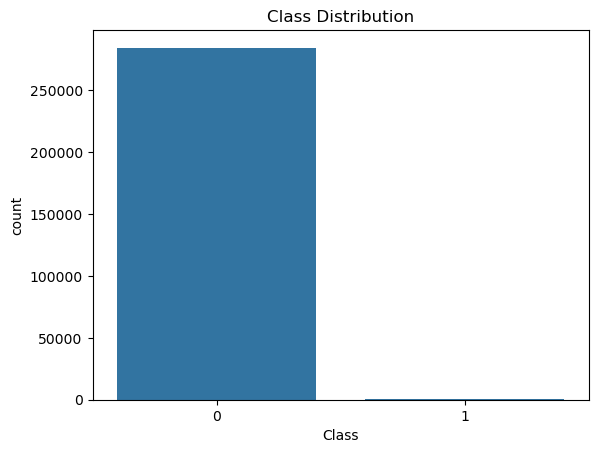

In [ ]:
# Plot class distribution

sns.countplot(x=credit_card_F_dataset["Class"])
plt.title("Class Distribution")
plt.show()

Splitting Data into Features & Labels

In [ ]:
# imbalance ratio of fruad cases and normal cases

fraud_cases = credit_card_F_dataset[credit_card_F_dataset["Class"] == 1]
normal_cases = credit_card_F_dataset[credit_card_F_dataset["Class"] == 0]


imbalance_ratio = len(normal_cases) / len(fraud_cases)
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")


Imbalance Ratio: 577.88


In [17]:
print('Shape of Fraud Cases =', fraud_cases.shape)  # shape of fraud_cases

print('Shape of Normal Cases =', normal_cases.shape) # shape of normal_cases

Shape of Fraud Cases = (492, 31)
Shape of Normal Cases = (284315, 31)


In [ ]:
# Define features (X) and target variable (y)
X = credit_card_F_dataset.drop(columns=["Class"])  # Features
y = credit_card_F_dataset["Class"]  # Target variable (fraud or not)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Scaling the Data

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Train Models

In [ ]:
# Train an Initial XGBoost Model

best_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
best_xgb.fit(X_train, y_train)

# Train an Initial Random Forest Model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train an Initial Logistic Regression Model

log_model = LogisticRegression(solver='liblinear', random_state=42)
log_model.fit(X_train, y_train)


Model Evaluation

In [ ]:
# Make predictions for each model

y_pred_xgb = best_xgb.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_log = log_model.predict(X_test)

# Define evaluation function
def evaluate_model(y_test, y_pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_pr = average_precision_score(y_test, y_pred)
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'AUC-PR: {auc_pr:.4f}')

print("\n📌 XGBoost Performance:")
evaluate_model(y_test, y_pred_xgb)

print("\n📌 Random Forest Performance:")
evaluate_model(y_test, y_pred_rf)

print("\n📌 Logistic Regression Performance:")
evaluate_model(y_test, y_pred_log)

Hyperparameter Tuning (Finding the Best XGBoost Model)

In [ ]:
# Define hyperparameter grid

param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 6, 9],
    "learning_rate": [0.01, 0.1, 0.2],
    "scale_pos_weight": [1, 10, 25]  # Handling class imbalance
}

# Perform Randomized Search

xgb_search = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
                                param_distributions=param_grid,
                                n_iter=10, scoring="f1", cv=3, random_state=42, n_jobs=-1)

xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_

Precision-Recall Curve

In [ ]:
# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall vs Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label="Precision", linestyle="--")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs. Decision Threshold")
plt.legend()
plt.grid()
plt.show()

Adjusting the Decision Threshold

In [ ]:
# Get fraud probability predictions

y_probs = best_xgb.predict_proba(X_test)[:, 1]  # Get probabilities for fraud class

# Set a custom threshold (e.g., 0.3 instead of 0.5)

threshold = 0.3
y_pred_custom = (y_probs >= threshold).astype(int)

# Evaluate new threshold

precision = precision_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)
f1 = f1_score(y_test, y_pred_custom)

print(f"\n📌 Custom Threshold ({threshold}):")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Building an Ensemble Model (XGBoost + RF + Logistic)

In [ ]:
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('log', LogisticRegression())
    ],
    voting='soft',  # Probability-based voting
    weights=[3, 2, 1]  # Giving more weight to XGBoost
)
ensemble_model.fit(X_train, y_train)

Stacking Instead of Averaging

In [ ]:
# Train individual models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Train stacking model (Logistic Regression as meta-model)
stacking_model = LogisticRegression()
stacking_features = np.column_stack([
    best_xgb.predict_proba(X_test)[:, 1],
    rf_model.predict_proba(X_test)[:, 1],
    log_model.predict_proba(X_test)[:, 1]
])
stacking_model.fit(stacking_features, y_test)
y_pred_stacked = stacking_model.predict(stacking_features)

# Evaluate stacked model
precision = precision_score(y_test, y_pred_stacked)
recall = recall_score(y_test, y_pred_stacked)
f1 = f1_score(y_test, y_pred_stacked)
auc_pr = average_precision_score(y_test, y_pred_stacked)

print("\n📌 Stacked Model Performance:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-PR: {auc_pr:.4f}")